# Classical Machine Learning 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

import lightgbm as lgbm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
os.getcwd()


'C:\\Users\\admin\\PycharmProjects\\Learn_ML_DL_AI\\ML_DL\\Audio Classification with DL'

In [3]:
df=pd.read_csv('train_data.csv')
df_t=pd.read_csv('test_data.csv')
print(df_t.head())
df.head()

   centroid_max  centroid_min  centroid_mean  centroid_std  centroid_kurtosis  \
0   5820.641540    261.040213    1489.099451    869.563705           3.616855   
1   4162.982445    222.777126     910.093663    617.512284           5.668595   
2   5473.726906    201.631743     846.608476    696.522263          12.843469   
3   4152.928614    228.475668     533.912001    292.272569          81.652454   
4   4100.772671    258.071118    1172.629536    719.401491          -0.074815   

   centroid_skew   flux_max  flux_min  flux_mean  flux_std  ...  \
0       1.591652  14.850361       0.0   1.520827  1.826153  ...   
1       2.222877  22.074821       0.0   1.542874  2.485558  ...   
2       3.163414   9.720446       0.0   1.176664  1.500442  ...   
3       8.014757  18.117476       0.0   0.813941  1.358511  ...   
4       0.839901  12.749510       0.0   1.239240  1.326141  ...   

   mfcc_18_kurtosis  mfcc_18_skew  mfcc_19_max  mfcc_19_min  mfcc_19_mean  \
0         -0.221446      0.104325

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,flux_max,flux_min,flux_mean,flux_std,...,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,label
0,4053.985673,925.934083,1727.645355,376.901924,6.096711,1.660034,10.981944,0.0,1.391008,1.481524,...,0.954234,0.303920,34.931175,-25.915401,1.033782,7.581626,0.408693,0.241352,123.046875,0
1,5430.122461,372.728961,1450.533158,615.185827,4.766277,1.475144,17.791128,0.0,1.444008,1.996799,...,1.002932,0.247480,31.484390,-20.805553,0.305457,7.547182,0.618586,0.401443,107.666016,0
2,4709.894987,356.735645,1493.679993,419.421447,11.343314,1.900807,14.719387,0.0,1.638258,1.950675,...,0.347786,0.555627,19.085352,-29.447058,-2.110433,6.445112,0.502269,-0.048041,161.499023,0
3,3692.033659,261.951363,996.753301,428.061426,2.700672,1.111419,14.619911,0.0,1.247379,1.750351,...,0.096114,-0.088479,24.258467,-23.636009,-1.658467,6.555074,0.942891,0.145058,172.265625,0
4,4484.855104,783.165978,1749.555484,599.338500,1.670321,1.118021,12.954987,0.0,1.644384,1.958142,...,0.617877,0.049771,11.389920,-41.104294,-11.026450,8.213293,0.469296,-0.549097,135.999178,0


In [4]:
X_train=df.drop('label',axis=1).values
y_train=df['label'].values
print(X_train.shape)
print(y_train.shape)
X_test=df_t.drop('label',axis=1).values
y_test=df_t['label'].values
print(X_test.shape)
print(y_test.shape)

(900, 169)
(900,)
(100, 169)
(100,)


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

## Support Vector Machines

In [ ]:
params = {
    "cls__C": [0.5, 1, 5, 10],
    "cls__kernel": ['rbf', 'sigmoid','poly'],
}

pipe_svm = Pipeline([
    ('scale', StandardScaler()),
    ('var_tresh', VarianceThreshold(threshold=0.1)),
    ('feature_selection', SelectFromModel(lgbm.LGBMClassifier())),
    ('cls', SVC())
])

grid_svm = GridSearchCV(pipe_svm, params, scoring='accuracy', n_jobs=-1, cv=9,verbose=2)
grid_svm.fit(X_train, y_train)

In [8]:
preds = grid_svm.predict(X_test)
print("Best score on validation set (accuracy) = {:.4f}".format(grid_svm.best_score_))
print("Best score on test set (accuracy) = {:.4f}".format(accuracy_score(y_test, preds)))

Best score on validation set (accuracy) = 0.7111
Best score on test set (accuracy) = 0.7200


In [7]:
from sklearn.externals import joblib

joblib.dump(grid_svm, "models/pipe_svm.joblib")

['models/pipe_svm.joblib']

## Xtreme Gradient Boost -XGB-

In [12]:
params = {
    "cls__max_depth": [4, 6, 10, 20],
    'cls__booster':['gbtree','dart']
}

pipe_xbg = Pipeline([
    ('var_tresh', VarianceThreshold(threshold=0.1)),
    ('cls', XGBClassifier(objective='multi:softmax',num_class=10,verbosity=1))
])

grid_xgb = GridSearchCV(pipe_xbg, params, scoring='accuracy', n_jobs=-1, cv=3)
grid_xgb.fit(X_train, y_train)

[10:08:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[10:08:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[10:08:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[10:08:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[10:08:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[10:08:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 26 extra nodes, 0 pruned

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('var_tresh',
                                        VarianceThreshold(threshold=0.1)),
                                       ('cls',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_

In [13]:
preds1 = grid_xgb.predict(X_test)
print("Best score on validation set (accuracy) = {:.4f}".format(grid_xgb.best_score_))
print("Best score on test set (accuracy) = {:.4f}".format(accuracy_score(y_test, preds1)))



Best score on validation set (accuracy) = 0.5678
Best score on test set (accuracy) = 0.6900


In [14]:
joblib.dump(grid_xgb, "models/pipe_xgb.joblib")



['models/pipe_xgb.joblib']

## Deep Neural Network

In [5]:
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Input
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.models import Model
from keras.activations import relu
from keras.callbacks import History 
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [6]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
input_shape=X_train.shape[1]
y_train_nn=to_categorical(y_train,10,'int')
y_train_nn[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
hist = History()

In [8]:
inp=Input(shape=(input_shape,))
model = Dense(500,activation='relu')(inp)
model = Dropout(0.3)(model)
model = Dense(8000,activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(4000,activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(2000,activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(1000,activation='relu')(model)
model = Dense(500,activation='relu')(model)
model = Dense(10,activation='softmax')(model)

model = Model(inputs=inp,outputs=model)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,verbose=1)
es=EarlyStopping(monitor='val_loss',patience=20,verbose=1)
#plot_model(model)

In [9]:
model.fit(X_train, y_train_nn, epochs = 120, validation_split = .055, callbacks = [hist,lr,es])

Train on 850 samples, validate on 50 samples
Epoch 1/120
850/850 [==============================] - 47s 55ms/step - loss: 1.8726 - accuracy: 0.3235 - val_loss: 2.6287 - val_accuracy: 0.0400

KeyboardInterrupt: 

0.19


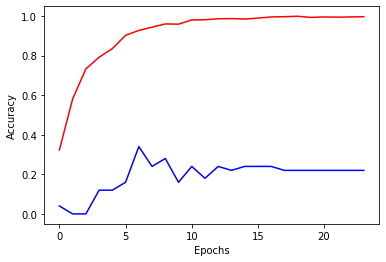

In [10]:
y_pred =  model.predict(X_test)
y_pred = np.round(y_pred[:,1])
print(accuracy_score(y_pred,y_test))

plt.plot(hist.history['accuracy'], color = 'red')
plt.plot(hist.history['val_accuracy'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()